In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Using TensorFlow backend.


In [42]:
liste=[]# Load the TensorBoard notebook extension
%load_ext tensorboard


In [43]:

dfA1 = pd.read_csv('inputA1.csv',names=['a11', 'a12','a13','a14','a15','a16'])
dfA2 = pd.read_csv('inputA2.csv',names=['a21', 'a22','a23','a24','a25','a26'])
dfA3 = pd.read_csv('inputA3.csv',names=['a31', 'a32','a33','a34','a35','a36'])
dfA4 = pd.read_csv('inputA4.csv',names=['a41', 'a42','a43','a44','a45','a46'])
dfA5 = pd.read_csv('inputA5.csv',names=['a51', 'a52','a53','a54','a55','a56'])


dfC = pd.read_csv('inputC.csv',names=['c1', 'c2','c3','c4','c5','c6'])
dfB1 = pd.read_csv('inputB1.csv',names=['B1'])
dfB2 = pd.read_csv('inputB2.csv',names=['B2'])
dfB3 = pd.read_csv('inputB3.csv',names=['B3'])
dfB4 = pd.read_csv('inputB4.csv',names=['B4'])
dfB5 = pd.read_csv('inputB5.csv',names=['B5'])
target= pd.read_csv('output.csv',names=['Var0', 'Var1','Var2','Var3','Var4','Var5'])


In [44]:
dataset = pd.concat([dfA1,dfA2,dfA3,dfA4,dfA5,dfB1,dfB2,dfB3,dfB4,dfB5,dfC,target], axis=1, sort=False)
train, validate, test = np.split(dataset.sample(frac=1), [int(.6*len(dataset)), int(.8*len(dataset))])
print(dataset)

          a11       a12       a13  a14       a15  a16       a21       a22  \
0    0.052556  0.166901  0.137718    0  0.043893    0  0.077723  0.087978   
1    0.125884  0.187970  0.139366    0  0.037804    0  0.063357  0.084081   
2    0.096723  0.192558  0.159630    0  0.038893    0  0.085472  0.087091   
3    0.147678  0.154509  0.136953    0  0.046059    0  0.060279  0.103382   
4    0.050547  0.205408  0.137091    0  0.042412    0  0.063953  0.086810   
..        ...       ...       ...  ...       ...  ...       ...       ...   
995  0.050216  0.183270  0.151542    0  0.048754    0  0.098030  0.101454   
996  0.061725  0.223085  0.148519    0  0.044129    0  0.087420  0.091174   
997  0.053334  0.176088  0.157776    0  0.038911    0  0.067271  0.084439   
998  0.067554  0.187609  0.161419    0  0.039811    0  0.090817  0.111321   
999  0.053606  0.157215  0.144050    0  0.039703    0  0.082437  0.104214   

          a23       a24  ...        c3        c4        c5        c6  Var0 

In [45]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(34, kernel_initializer='normal',input_dim = train[['a11', 'a12','a13','a14','a15','a16',
                                                                    'a21', 'a22','a23','a24','a25','a26',
                                                                    'a31', 'a32','a33','a34','a35','a36',
                                                                    'a41', 'a42','a43','a44','a45','a46',
                                                                     'a51', 'a52','a53','a54','a55','a56', 
                                                                    'B1','B2','B3','B4','B5',
                                                                    'c1', 'c2','c3','c4','c5','c6']].shape[1],
                                                                    activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))

#NN_model.add(Dense(30, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(6, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
#NN_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 34)                1428      
_________________________________________________________________
dense_56 (Dense)             (None, 100)               3500      
_________________________________________________________________
dense_57 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_58 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_59 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_60 (Dense)             (None, 6)                 606       
Total params: 35,834
Trainable params: 35,834
Non-trainable params: 0
_________________________________________________

In [48]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 2, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

NameError: name 'log_dir' is not defined

In [41]:
NN_model.fit(train[['a11', 'a12','a13','a14','a15','a16',
                    'a21', 'a22','a23','a24','a25','a26',
                    'a31', 'a32','a33','a34','a35','a36',
                    'a41', 'a42','a43','a44','a45','a46',
                    'a51', 'a52','a53','a54','a55','a56',
                    'B1','B2','B3','B4','B5',
                    'c1', 'c2','c3','c4','c5','c6']], train[['Var0', 'Var1','Var2','Var3','Var4','Var5']], epochs=500,
                     batch_size=32, validation_split = 0.2, callbacks=callbacks_list,
                    )


ValueError: Error when checking target: expected dense_54 to have shape (1,) but got array with shape (6,)

In [47]:
NN_model.fit(train[['a11', 'a12','a13','a14','a15','a16',
                    'a21', 'a22','a23','a24','a25','a26',
                    'a31', 'a32','a33','a34','a35','a36',
                    'a41', 'a42','a43','a44','a45','a46',
                    'a51', 'a52','a53','a54','a55','a56',
                    'B1','B2','B3','B4','B5',
                    'c1', 'c2','c3','c4','c5','c6']], train[['Var0', 'Var1','Var2','Var3','Var4','Var5']], epochs=500,
                     batch_size=32, validation_split = 0.2, callbacks=tensorboard_callback,
                    )

NameError: name 'tensorboard_callback' is not defined

In [9]:
print(callbacks_list)

In [11]:

# Load wights file of the best model :
wights_file = 'Weights-440--2.36772.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [36]:

predictions = NN_model.predict(test[['a11', 'a12','a13','a14','a15','a16',
                                    'a21', 'a22','a23','a24','a25','a26',
                                    'a31', 'a32','a33','a34','a35','a36',
                                     'a41', 'a42','a43','a44','a45','a46',
                                     'a51', 'a52','a53','a54','a55','a56',
                                     'B1','B2','B3','B4','B5',
                                    'c1', 'c2','c3','c4','c5','c6']])
print(predictions[:,1][:])

[42.6442   32.96847  35.917534 47.18555  40.56782  41.821613 41.33475
 32.5661   39.50702  46.880505 30.403475 47.517    39.152466 35.184372
 42.08583  54.3192   40.26273  52.340786 31.619648 32.342827 33.65508
 45.7053   32.490463 34.612434 41.947445 46.502495 34.737118 32.905144
 43.763878 35.51286  46.074055 30.911795 30.471163 44.47991  46.786884
 45.859932 30.585304 37.08292  42.090416 45.23929  36.984566 40.674244
 39.895752 32.123974 43.06127  51.572483 48.176598 47.900616 50.87483
 52.34889  49.884785 32.141228 44.07617  51.092487 45.491055 39.878517
 40.344135 33.7612   30.688168 45.76426  33.873528 47.996845 43.432804
 52.75432  48.156498 43.092556 44.86119  35.049564 29.776087 43.300247
 36.972076 50.454826 49.34616  49.591846 42.02649  46.284218 39.39887
 47.760704 54.92978  49.620613 29.741793 41.67679  36.332798 46.32105
 42.139576 39.919437 38.43899  30.474915 53.93048  46.806232 35.026093
 32.03535  42.457027 38.5967   49.59769  35.466297 46.8607   32.579983
 37.353638 

In [41]:
print(predictions[:,1][0])

42.6442


In [14]:
print(test[['Var0', 'Var1','Var2','Var3','Var4','Var5']])

     Var0       Var1       Var2  Var3  Var4       Var5
597   0.0  42.117838   0.000000   0.0   0.0  57.882162
867   0.0  32.969476   0.000000   0.0   0.0  67.030524
276   0.0  36.332911   0.000000   0.0   0.0  63.667089
793   0.0   0.000000  51.914611   0.0   0.0  48.085389
994   0.0  41.105931   0.000000   0.0   0.0  58.894069
..    ...        ...        ...   ...   ...        ...
431   0.0  33.922109   0.000000   0.0   0.0  66.077891
249   0.0   0.000000  43.758308   0.0   0.0  56.241692
729   0.0  44.276443   0.000000   0.0   0.0  55.723557
367   0.0  35.106070   0.000000   0.0   0.0  64.893930
78    0.0  37.395506   0.000000   0.0   0.0  62.604494

[200 rows x 6 columns]


In [ ]:
#from keras.layers import Input, Dense
#from keras.models import Model

# This returns a tensor
#inputs = Input(shape=(4,))
# a layer instance is callable on a tensor, and returns a tensor
#output_1 = Dense(64, activation='relu')(inputs)
#output_2 = Dense(64, activation='relu')(output_1)
#predictions = Dense(1, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
#model = Model(inputs=inputs, outputs=predictions)
#model.compile(optimizer='rmsprop',
#              loss='mean_absolute_error',
#              metrics=['accuracy'])
#model.fit(train, target)  # starts training

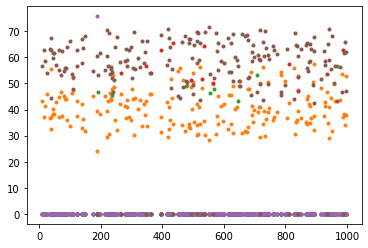

In [42]:

plt.plot(test[['Var0', 'Var1','Var2','Var3','Var4','Var5']],'.')

In [42]:
test.head(10)

,a11,a12,a13,a14,a15,a16,a21,a22,a23,a24,...,c3,c4,c5,c6,Var0,Var1,Var2,Var3,Var4,Var5
597,0.112243,0.208630,0.156719,0,0.048084,0,0.074336,0.103889,0.086011,0.011157,...,0.010388,0.001966,0.004089,0.000681,0.0,42.117838,0.000000,0.0,0.0,57.882162
867,0.112405,0.214014,0.159289,0,0.033054,0,0.080864,0.096128,0.100536,0.011864,...,0.011759,0.001692,0.006498,0.001187,0.0,32.969476,0.000000,0.0,0.0,67.030524
276,0.079173,0.229041,0.151755,0,0.047436,0,0.094500,0.086914,0.103177,0.011344,...,0.010736,0.001200,0.005504,0.000941,0.0,36.332911,0.000000,0.0,0.0,63.667089
793,0.142827,0.165241,0.153835,0,0.031831,0,0.084573,0.115218,0.085763,0.007570,...,0.007857,0.001238,0.006824,0.001231,0.0,0.000000,51.914611,0.0,0.0,48.085389
994,0.140259,0.188565,0.148177,0,0.033896,0,0.096316,0.090517,0.113587,0.007039,...,0.009447,0.001900,0.003007,0.001155,0.0,41.105931,0.000000,0.0,0.0,58.894069
221,0.064670,0.192500,0.163922,0,0.030103,0,0.094997,0.096454,0.115522,0.011270,...,0.008419,0.002586,0.004777,0.001159,0.0,42.304536,0.000000,0.0,0.0,57.695464
188,0.122693,0.212865,0.135190,0,0.039556,0,0.081141,0.110973,0.129417,0.011459,...,0.009978,0.002100,0.005604,0.000550,0.0,41.351460,0.000000,0.0,0.0,58.648540
885,0.070587,0.224920,0.141585,0,0.031257,0,0.080748,0.110164,0.127424,0.007846,...,0.007550,0.002245,0.004898,0.001162,0.0,32.922151,0.000000,0.0,0.0,67.077849
499,0.060634,0.207915,0.161348,0,0.044653,0,0.084666,0.086755,0.084581,0.008236,...,0.010220,0.002913,0.006660,0.001494,0.0,39.896269,0.000000,0.0,0.0,60.103731
745,0.071131,0.188064,0.150214,0,0.035669,0,0.082040,0.084891,0.121864,0.008592,...,0.010130,0.002110,0.005194,0.001107,0.0,46.814043,0.000000,0.0,0.0,53.185957


In [74]:
print(predictions[:,1][:])
print(test['Var1'][0])
print((predictions[:,0][0]-test['Var0'][0]))

[42.6442   32.96847  35.917534 47.18555  40.56782  41.821613 41.33475
 32.5661   39.50702  46.880505 30.403475 47.517    39.152466 35.184372
 42.08583  54.3192   40.26273  52.340786 31.619648 32.342827 33.65508
 45.7053   32.490463 34.612434 41.947445 46.502495 34.737118 32.905144
 43.763878 35.51286  46.074055 30.911795 30.471163 44.47991  46.786884
 45.859932 30.585304 37.08292  42.090416 45.23929  36.984566 40.674244
 39.895752 32.123974 43.06127  51.572483 48.176598 47.900616 50.87483
 52.34889  49.884785 32.141228 44.07617  51.092487 45.491055 39.878517
 40.344135 33.7612   30.688168 45.76426  33.873528 47.996845 43.432804
 52.75432  48.156498 43.092556 44.86119  35.049564 29.776087 43.300247
 36.972076 50.454826 49.34616  49.591846 42.02649  46.284218 39.39887
 47.760704 54.92978  49.620613 29.741793 41.67679  36.332798 46.32105
 42.139576 39.919437 38.43899  30.474915 53.93048  46.806232 35.026093
 32.03535  42.457027 38.5967   49.59769  35.466297 46.8607   32.579983
 37.353638 

In [68]:
a=test['Var1'].to_numpy()
type(a)

numpy.ndarray

In [52]:
for i in range(200):
    a[i]=

[ 0.00000000e+000  6.17582057e-322  0.00000000e+000  6.92640531e-310
  0.00000000e+000              nan              nan  0.00000000e+000
  1.88492663e-240  0.00000000e+000  4.44659081e-323  5.57022207e-313
  6.92640531e-310              nan  0.00000000e+000              nan
  0.00000000e+000 -6.32744249e+304  3.55727265e-322  5.43472210e-323
  5.57022207e-313  6.92640531e-310  2.47032823e-323  4.94065646e-323
              nan  0.00000000e+000  2.12199579e-314  7.11454530e-322
  5.43472210e-323  5.57022207e-313  6.92640531e-310  0.00000000e+000
  1.28457068e-322              nan  0.00000000e+000  4.94065646e-324
  1.06718180e-321  5.43472210e-323  5.57022207e-313  6.92640531e-310
              nan  1.28457068e-322              nan  0.00000000e+000
  2.12199579e-314  1.42290906e-321  5.43472210e-323  5.57022207e-313
  6.92640531e-310  0.00000000e+000  9.88131292e-323              nan
  5.56933614e-313  2.12199579e-314  1.77863633e-321  3.45845952e-323
  5.57022207e-313  6.92640531e-310

(array([15., 26., 26., 23., 28., 22., 29., 15., 11.,  5.]),
 array([29.397623, 31.950838, 34.504055, 37.05727 , 39.610485, 42.1637  ,
        44.716915, 47.270134, 49.82335 , 52.376564, 54.92978 ],
       dtype=float32),
 <a list of 10 Patch objects>)

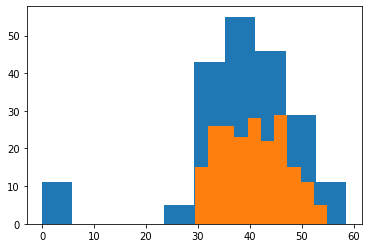

In [82]:
plt.hist(a)
plt.hist(predictions[:,1][:])

In [84]:
for i in range(200):
    erreur=(a[i]-predictions[:,1][i])*(a[i]-predictions[:,1][i])
    print(erreur)

0.27705629323670583
1.0089658076196094e-06
0.1725381563789038
2226.47619388999
0.28956183110001155
0.23321432280962778
0.00027918636506878847
0.12677154964883328
0.1515155290488329
0.004417145358455557
0.009563899629315854
1.9078590460766798
0.00036669108270426747
0.1252487856597005
1771.2171447391156
9.317276351906777
0.3184157049835437
2.2823958373517357
0.06397359515058364
0.0003817004934161475
0.1642422426531201
4.919171887970703
0.008643373143991639
0.03745796880027653
0.12949999994212064
2162.482023741177
0.16600835807640307
0.16537500882886605
1915.2770061023184
0.2200038269599123
352.6898918103177
0.00014894585440978358
0.00016995805048032747
3.368051519302016
0.021073547271705656
3.7756183896534656
0.09963950595100513
0.004799569523575788
1.9139450957617212
0.1402489992313048
0.025497148357072404
0.18688582069445855
0.0778181498334096
0.05851084639143567
0.014534151188331314
7.373043821482328
0.6118421664574928
0.5347006880602012
5.970715030170877
0.5208633073312824
0.65492489